In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   # for heatmap
from my_functions import *

In [59]:
plt.style.use("seaborn-v0_8-darkgrid")

In [60]:
# Load the data
data = pd.read_csv("../files/input/data.csv", encoding="utf-8", sep=",")
data.head(50)

,BARRIO,COMUNA,DIRECCIÓN,DISEÑO,CLASE,GRAVEDAÑOSSADAÑOSS,DÍA DE LA SEMANA,AÑO,MES,DIA,HORA24
0,palenque,robledo,cl 68 cr 87,via,atropello,heridos,domingo,2017,enero,1,12
1,villatina,villa hermosa,cr 16 cl 56,via,choque,heridos,domingo,2017,enero,1,12
2,campo alegre,la américa,cl 44 cr 93,via,choque,heridos,domingo,2017,enero,1,12
3,las granjas,manrique,cr 41 cl 85,cruce,choque,daños,domingo,2017,enero,1,1
4,kennedy,doce de octubre,cr 76 cl 91,via,choque,heridos,domingo,2017,enero,1,1
5,villa hermosa,villa hermosa,cr 39 cl 66,via,caida ocupante,heridos,domingo,2017,enero,1,1
6,miranda,aranjuez,cr 52 cl 82,cruce,atropello,heridos,domingo,2017,enero,1,1
7,centro administrativo,la candelaria,cr 55 cl 41,via,caida ocupante,heridos,domingo,2017,enero,1,1
8,manrique oriental,manrique,cr 41 cl 72,via,otro,heridos,domingo,2017,enero,1,2
9,manrique oriental,manrique,cr 36 a cl 68,cruce,choque,heridos,domingo,2017,enero,1,2


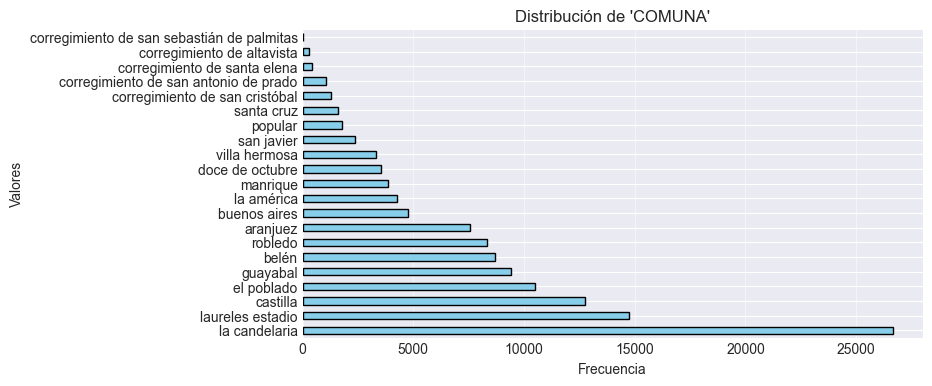

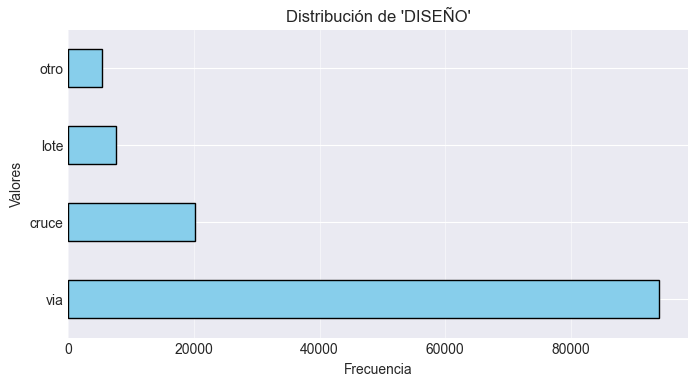

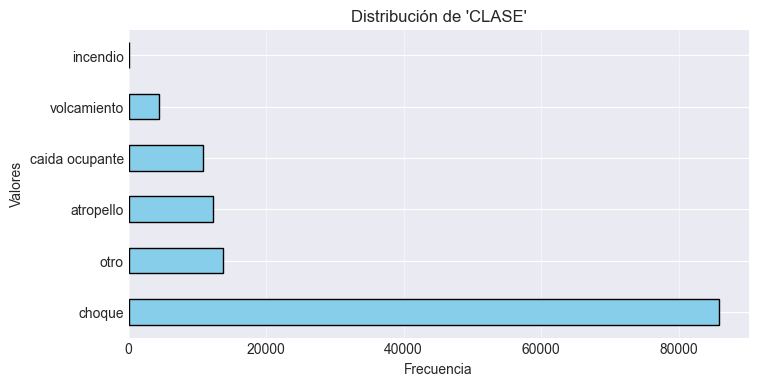

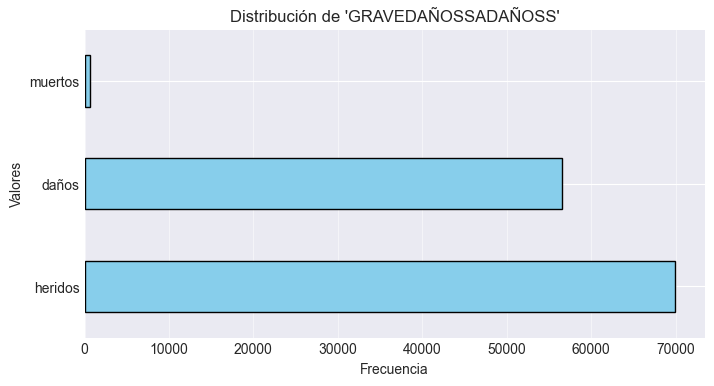

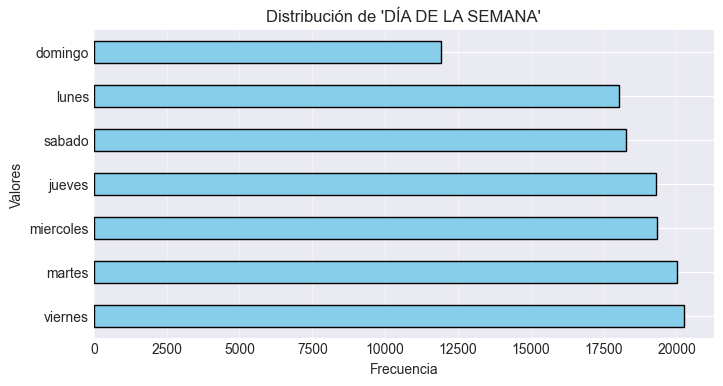

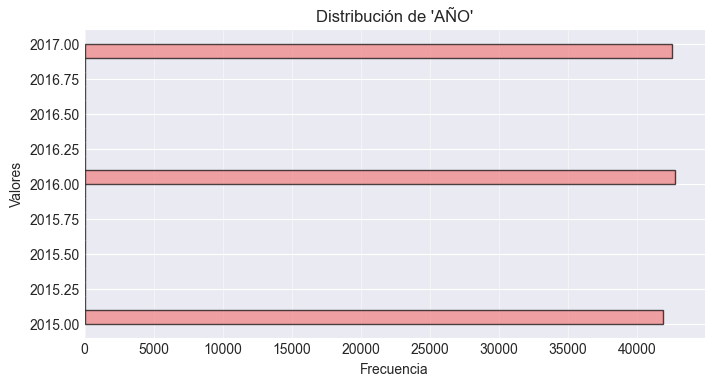

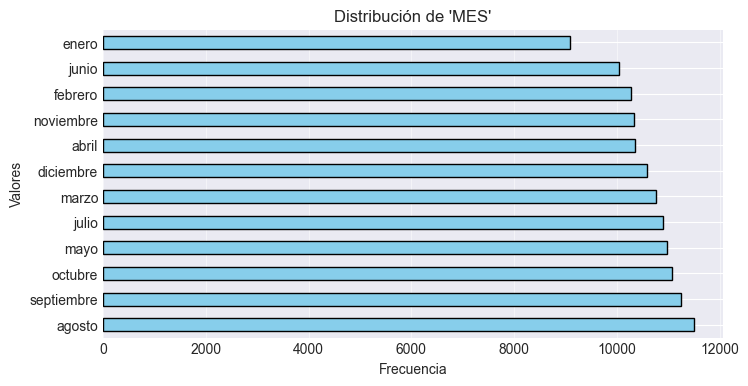

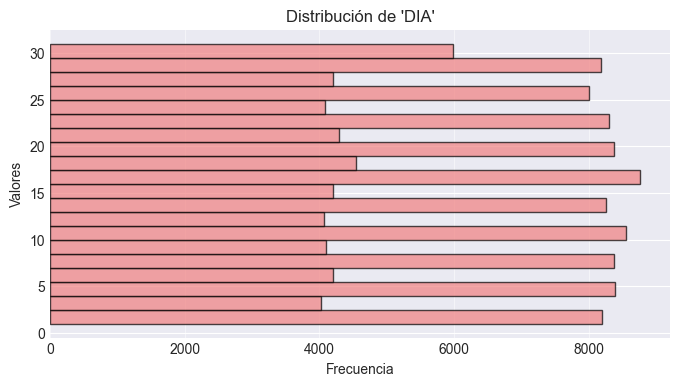

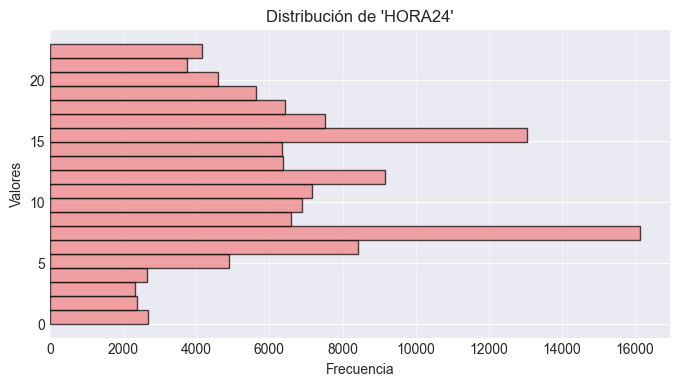

In [61]:
graficar_histogramas(data)

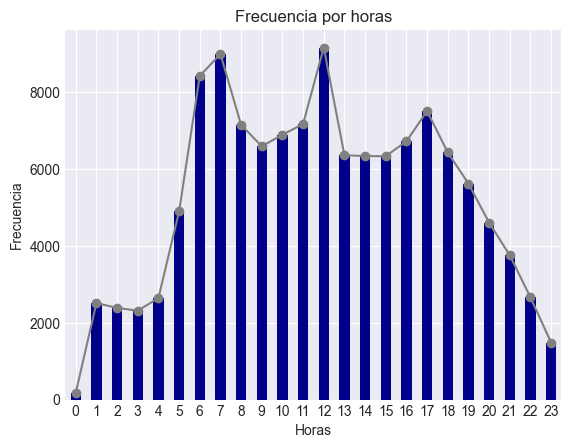

In [62]:
# Frecuencia por HORAS24 en vertical
ax = data["HORA24"].value_counts().sort_index().plot(kind="bar",color="darkblue")
data["HORA24"].value_counts().sort_index().plot(kind="line", color="gray", marker='o', ax=ax, label="Tendencia")
plt.title("Frecuencia por horas")
plt.xlabel("Horas")
plt.ylabel("Frecuencia")
plt.show()

In [63]:
data.columns

Index(['BARRIO', 'COMUNA', 'DIRECCIÓN', 'DISEÑO', 'CLASE',
       'GRAVEDAÑOSSADAÑOSS', 'DÍA DE LA SEMANA', 'AÑO', 'MES', 'DIA',
       'HORA24'],
      dtype='object')

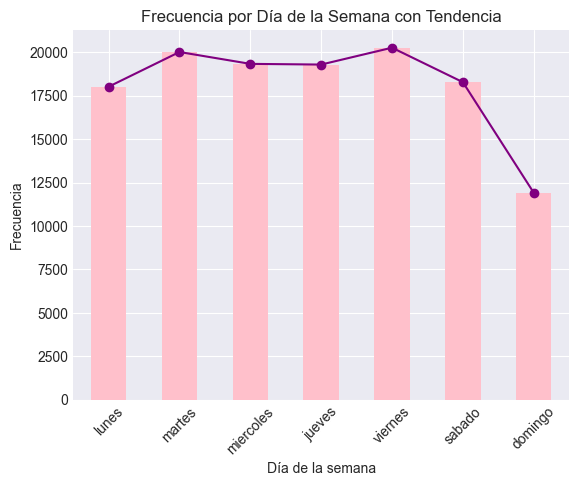

In [92]:
data['DÍA DE LA SEMANA'] = pd.Categorical(data['DÍA DE LA SEMANA'], categories=['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']
, ordered=True)
frecuencia_por_mes = data["DÍA DE LA SEMANA"].value_counts().sort_index()
ax = frecuencia_por_mes.plot(kind="bar", color="pink", label="Frecuencia")

frecuencia_por_mes.plot(kind="line", color="purple", marker='o', ax=ax, label="Tendencia")


plt.title("Frecuencia por Día de la Semana con Tendencia")
plt.xlabel("Día de la semana")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")
plt.show()

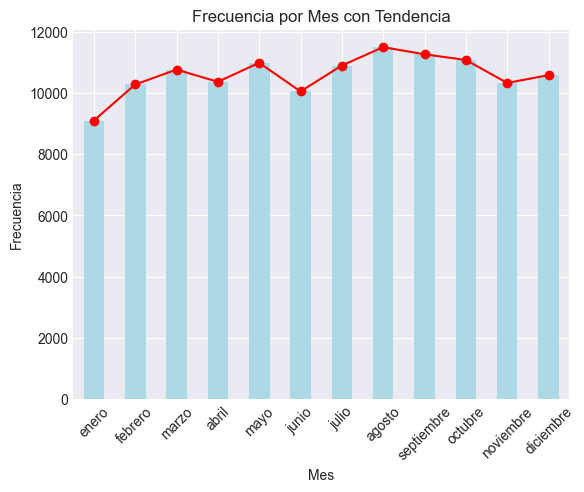

In [90]:
data['MES'] = pd.Categorical(data['MES'], categories=["enero", "febrero", "marzo", "abril", "mayo", "junio", 
                                                      "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"], 
                              ordered=True)


frecuencia_por_mes = data["MES"].value_counts().sort_index()

ax = frecuencia_por_mes.plot(kind="bar", color="lightblue", label="Frecuencia")


frecuencia_por_mes.plot(kind="line", color="red", marker='o', ax=ax, label="Tendencia")
plt.title("Frecuencia por Mes con Tendencia")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")


plt.show()

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127136 entries, 0 to 127135
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   BARRIO              127136 non-null  object  
 1   COMUNA              127136 non-null  object  
 2   DIRECCIÓN           127136 non-null  object  
 3   DISEÑO              127136 non-null  object  
 4   CLASE               127136 non-null  object  
 5   GRAVEDAÑOSSADAÑOSS  127136 non-null  object  
 6   DÍA DE LA SEMANA    127136 non-null  category
 7   AÑO                 127136 non-null  int64   
 8   MES                 127136 non-null  category
 9   DIA                 127136 non-null  int64   
 10  HORA24              127136 non-null  int64   
dtypes: category(2), int64(3), object(6)
memory usage: 9.0+ MB


ZONA MAPA

In [67]:
data.head()

,BARRIO,COMUNA,DIRECCIÓN,DISEÑO,CLASE,GRAVEDAÑOSSADAÑOSS,DÍA DE LA SEMANA,AÑO,MES,DIA,HORA24
0,palenque,robledo,cl 68 cr 87,via,atropello,heridos,domingo,2017,enero,1,12
1,villatina,villa hermosa,cr 16 cl 56,via,choque,heridos,domingo,2017,enero,1,12
2,campo alegre,la américa,cl 44 cr 93,via,choque,heridos,domingo,2017,enero,1,12
3,las granjas,manrique,cr 41 cl 85,cruce,choque,daños,domingo,2017,enero,1,1
4,kennedy,doce de octubre,cr 76 cl 91,via,choque,heridos,domingo,2017,enero,1,1


In [68]:
data_med = data[["DIRECCIÓN","BARRIO","COMUNA"]]

conteo_accidentes = data_med.value_counts().reset_index()

conteo_accidentes.columns = list(data_med.columns) + ['#ACCIDENTES']

conteo_accidentes['DIRECCIÓN'] = conteo_accidentes['DIRECCIÓN'].str.replace(r'\bCR\b', 'carrera', regex=True).str.replace(r'\bCL\b', 'calle', regex=True)

conteo_accidentes.head(30)

,DIRECCIÓN,BARRIO,COMUNA,#ACCIDENTES
0,cr 64 c cl 78,terminal de transporte,castilla,627
1,cr 64 c cl 67,caribe,castilla,377
2,cr 80 cl 65,facultad de minas u. nacional,robledo,348
3,cr 52 cl 10,campo amor,guayabal,342
4,cr 63 cl 44,naranjal,laureles estadio,341
5,cr 48 cl 10,manila,el poblado,325
6,cr 57 cl 44,guayaquil,la candelaria,324
7,cr 64 c cl 72,caribe,castilla,319
8,cr 65 cl 10,campo amor,guayabal,260
9,cr 65 cl 80,terminal de transporte,castilla,247


In [69]:
conteo_accidentes.shape[0]

23362

In [70]:
direcciones = []
accidentes = []
for i in range(100):
    direccion = f"{conteo_accidentes.loc[i]['DIRECCIÓN']}, {conteo_accidentes.loc[i]['BARRIO']}, {conteo_accidentes.loc[i]['COMUNA']}"
    direcciones.append(direccion)
    accidentes.append(conteo_accidentes.loc[i]['#ACCIDENTES'])

In [71]:
direcciones = pd.DataFrame({
    "direcciones": direcciones,
    "lat": [None] * len(direcciones),
    "lon": [None] * len(direcciones),
    "num_accidentes":accidentes
})

In [72]:
direcciones.to_excel('direcciones.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'